In [1]:
import tensorflow as tf
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout,Activation, Flatten, Conv2D, MaxPooling2D
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import cross_val_score
# Supress unnecessary warnings so that presentation looks clean
import warnings
warnings.filterwarnings("ignore")

Using TensorFlow backend.


In [2]:
dataset = pd.read_csv(r'E:\yjn6gtwcdb-1\yjn6gtwcdb-1\HEA Phase Prediction_Datasets and Code\AM_IM_SS_9 features.csv')
dataset.head()

,Alloy,No,Component,Fraction,a,delta,Elec_nega,D_elec_nega,VEC,d_VEC,BulkModulus,D_Bulk,omega,Phase_inshort
0,Pd82Si18,2,Pd Si,82 18,1.335040,0.063885,2.146000,0.115256,8.920000,2.305125,1.660000e+11,30.734996,26.169089,AM
1,CuNi2FeCrAl1.5,5,Cu Ni Fe Cr Al,1 2 1 1 1.5,1.293538,0.059313,1.788462,0.128891,7.615385,2.975243,1.450000e+11,40.127017,305.315507,SS
2,AlMo0.5NbTa0.5TiZr,6,Al Mo Nb Ta Ti Zr,1 0.5 1 0.5 1 1,1.464500,0.050410,1.582000,0.217614,4.300000,0.900000,1.280000e+11,56.308713,225.161663,IM+SS
3,AlEr2,2,Al Er,1 2,1.648000,0.092679,1.363333,0.174420,3.000000,0.000000,5.466667e+10,15.084945,28.099609,IM
4,Ce65Al10Ni10Cu10Nb5,5,Ce Al Ni Cu Nb,65 10 10 10 5,1.653300,0.144722,1.350000,0.325392,4.600000,2.989983,6.240000e+10,60.360915,69.715430,AM


<AxesSubplot:xlabel='Phase_inshort', ylabel='count'>

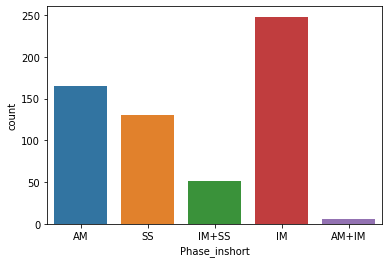

In [4]:
sns.countplot(dataset['Phase_inshort'],label="Count")

In [5]:
X = dataset.iloc[:,4:13].values
y = dataset.iloc[:,13].values

In [6]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 1))
X = scaler.fit_transform(X)
X = pd.DataFrame(X)

In [7]:
print(dataset.groupby(y).size())

AM       165
AM+IM      6
IM       248
IM+SS     51
SS       131
dtype: int64


In [8]:
X = X.values

In [9]:
def baseline_model():
    # Create model here
    model = Sequential()
    model.add(Dense(9, input_dim = 9, activation = 'relu')) # Rectified Linear Unit Activation Function
    model.add(Dense(18, activation = 'relu'))
    model.add(Dense(18, activation = 'relu'))
    model.add(Dense(18, activation = 'relu'))
    model.add(Dense(18, activation = 'relu'))
    model.add(Dense(5, activation = 'softmax')) # Softmax for multi-class classification
    # Compile model here
    model.compile(loss = 'categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy'])
    return model

In [10]:
estimator = KerasClassifier(build_fn = baseline_model, epochs = 100, batch_size = 10, verbose = 0)

In [11]:
from tensorflow.keras.utils import plot_model
plot_model(baseline_model, to_file='model.png')

('You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) ', 'for plot_model/model_to_dot to work.')


In [12]:
from sklearn.model_selection import KFold
kfold = KFold(n_splits = 10, shuffle = True, random_state = 1)

In [13]:
results = cross_val_score(estimator, X, y, cv = kfold)
# Result

print("Result: %.2f%% (%.2f%%)" % (results.mean()*100, results.std()*100))


Result: 77.56% (6.59%)


In [14]:
from sklearn.model_selection import cross_val_predict
y_pred = cross_val_predict(estimator, X, y, cv = kfold)

In [15]:
y

array(['AM', 'SS', 'IM+SS', 'IM', 'AM', 'IM', 'IM', 'SS', 'IM', 'AM',
       'AM', 'SS', 'AM', 'IM', 'IM+SS', 'IM', 'SS', 'SS', 'IM', 'AM',
       'SS', 'AM', 'AM', 'SS', 'AM', 'IM', 'IM+SS', 'IM', 'IM', 'IM+SS',
       'AM', 'IM+SS', 'IM', 'SS', 'AM', 'AM', 'IM', 'AM', 'SS', 'IM',
       'AM', 'IM', 'IM', 'IM+SS', 'AM', 'IM', 'IM+SS', 'IM', 'IM', 'AM',
       'IM', 'IM', 'IM', 'AM', 'AM', 'SS', 'IM', 'IM+SS', 'IM', 'IM',
       'AM', 'AM+IM', 'IM', 'IM+SS', 'IM', 'SS', 'AM', 'IM+SS', 'AM',
       'SS', 'SS', 'AM', 'SS', 'IM', 'IM', 'IM', 'AM', 'IM', 'IM', 'AM',
       'AM', 'AM', 'IM', 'SS', 'SS', 'AM', 'IM', 'IM', 'IM', 'AM', 'AM',
       'IM', 'SS', 'IM', 'IM', 'SS', 'SS', 'AM', 'SS', 'IM', 'AM', 'SS',
       'AM', 'IM', 'IM', 'SS', 'SS', 'SS', 'IM', 'IM', 'AM', 'IM', 'IM',
       'AM', 'SS', 'AM', 'IM', 'IM', 'IM+SS', 'IM', 'IM', 'IM', 'AM',
       'AM', 'IM', 'IM', 'IM', 'IM', 'SS', 'AM', 'AM', 'IM', 'IM', 'AM',
       'IM', 'SS', 'IM', 'IM', 'AM', 'AM', 'AM', 'IM', 'AM+IM', 'IM+S

In [16]:
y_pred

array(['IM', 'SS', 'IM', 'IM', 'AM', 'IM', 'IM', 'SS', 'IM', 'AM', 'AM',
       'SS', 'AM', 'IM', 'SS', 'IM', 'SS', 'SS', 'IM', 'AM', 'SS', 'AM',
       'AM', 'SS', 'AM', 'SS', 'SS', 'IM', 'IM', 'IM+SS', 'AM', 'SS',
       'IM', 'SS', 'AM', 'AM', 'IM', 'AM', 'SS', 'IM', 'AM', 'IM', 'AM',
       'SS', 'AM', 'AM', 'SS', 'SS', 'IM', 'IM+SS', 'IM', 'AM', 'IM',
       'AM', 'AM', 'SS', 'IM', 'IM+SS', 'SS', 'IM', 'AM', 'AM', 'IM',
       'SS', 'IM+SS', 'SS', 'AM', 'IM+SS', 'AM', 'SS', 'SS', 'AM', 'SS',
       'IM', 'IM', 'IM', 'AM', 'IM', 'IM', 'AM', 'AM', 'AM', 'IM', 'SS',
       'IM+SS', 'AM', 'IM', 'IM', 'IM', 'IM', 'AM', 'IM', 'SS', 'IM',
       'IM', 'SS', 'SS', 'AM', 'SS', 'AM', 'AM', 'SS', 'IM', 'IM', 'IM',
       'SS', 'SS', 'SS', 'IM', 'IM', 'AM', 'IM', 'IM', 'AM', 'SS', 'AM',
       'IM', 'IM', 'IM+SS', 'IM', 'IM+SS', 'SS', 'AM', 'AM', 'IM', 'IM',
       'SS', 'IM', 'SS', 'SS', 'IM', 'IM', 'IM+SS', 'AM', 'IM', 'SS',
       'IM', 'IM', 'AM', 'AM', 'AM', 'AM', 'IM+SS', 'IM+SS', 'AM',

In [17]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y, y_pred)

array([[143,   0,  17,   2,   3],
       [  5,   0,   0,   1,   0],
       [ 23,   0, 199,   5,  21],
       [  1,   0,   2,  20,  28],
       [  3,   0,   9,   6, 113]], dtype=int64)

In [17]:
.

SyntaxError: invalid syntax (Temp/ipykernel_11040/1933637684.py, line 1)